# ĐỒ ÁN CUỐI KỲ (LTKHDL - CQ2017/2)
### GVHD: TS. Trần Trung Kiên

Họ và tên sinh viên: Nguyễn Hữu Huân

MSSV: 1712466

------

## Import

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---

## Lấy dữ liệu

Dữ liệu mà em sử dụng ở đây được lấy từ [dataset của Yelp trên Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset). Yelp là một công ty công nghệ lớn ở Mỹ với sản phẩm nổi bật là Yelp website và Yelp app cho phép người dùng tìm kiếm, đánh giá, bình luận, đặt chỗ dịch vụ của các cở sở kinh doanh. 

Khi tải dataset này về đồng nghĩa với việc đã chấp nhận điều khoản sử dụng (một file pdf khá dài) được viết bởi Yelp dành riêng cho dataset này ví dụ như là chỉ được sử dụng cho mục đích học tập giáo dục,...

Vì dataset này khá lớn (tầm 10GB) và chủ đề chính mà em quan tâm ở đây chỉ là nhà hàng, món ăn (liên quan tới Việt Nam càng tốt) nên em chỉ sử dụng 2 file json là: "yelp_academic_dataset_business.json" và "yelp_academic_dataset_review.json" trong số 5 file của dataset. File "yelp_academic_dataset_business.json" chứa thông tin của các cơ sở kinh doanh (không chỉ nhà hàng), còn file "yelp_academic_dataset_review.json" chứa thông tin đánh giá của người dùng đối với cơ sở kinh doanh đó.  

-----

## Khám phá dữ liệu

### Data Description

Phần mô tả dữ liệu này Yelp không cung cấp trên Kaggle mà để ở trang chủ của mình [ở đây](https://www.yelp.com/dataset/documentation/main). Em có dịch sơ lại như sau:

- "yelp_academic_dataset_review.json":
    - **business_id**: mã id của doanh nghiệp (string, 22 chữ số và duy nhất)
    - **name**: tên doanh nghiệp (string)
    - **address**: địa chỉ (string)
    - **city**: thành phố (string)
    - **state**: mã bang  (string, 2 kí tự)
    - **postal_code**: mã bưu chính (string)
    - **latitude**: vĩ độ (float)
    - **longitude**: kinh độ (float)
    - **stars**: sao trung bình (float, làm tròn 0.5)
    - **review_count**: số lượng review (int)
    - **is_open**: có còn hoạt động hay không (int, 0: là đã đóng cửa và 1: còn hoạt động)
    - **attribute**: một số thông tin về doanh nghiệp (object : đậu xe như thế nào, thanh toán thẻ được không,..)
    - **categories**: danh sách các loại của doanh nghiệp (array of string)
    - **hours**: giở mở cửa (object: Thứ Hai từ mấy giờ tới mấy giờ, Thứ Ba,...)
- "yelp_academic_dataset_review.json":
    - **user_id**: mã id người dùng (string, 22 chữ số và duy nhất)
    - **text**: nội dung review (string)
    - **date**: ngày review (string, format là yyyy-mm-dd HH:MM:SS)
    - **review_id**: mã id của review (string, 22 chữ số và duy nhất)
    - **business_id**: mã doanh nghiệp được review (string, 22 chữ số và duy nhất)
    - **funny**: độ hài hước của review này được vote (int)
    - **cool**: độ "ngầu" của review này được vote (int)
    - **useful**: độ có ích của review được vote (int)
    - **stars**: số sao review (int)

### Đọc dữ liệu vào DataFrame

Khá may mắn là mặc dù các file này là json nhưng cấu trúc nó khá "ngay ngắn" và có thể đọc thành DataFrame bằng hàm `pd.read_json()`. Nhưng cũng khá xui vì file về reviews khá nặng (6GB!), ban đầu em cũng thử cố đọc file này bằng cách định nghĩa các cột trước khi đọc và chia thành đọc các 'chunk' nhỏ, tuy nhiên máy vẫn bị "đơ". Để tiết kiệm thời gian thì em đã lên Kaggle tải file ["reviews.csv"](https://www.kaggle.com/darshank2019/review) mà người khác đã convert trước đó.

In [2]:
business_df = pd.read_json('data/yelp_academic_dataset_business.json', lines=True)

In [4]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


 Vì file csv này là của phiên bản reviews đươc người khác cách đây 1 năm (tức là của phiên bản ít nhất cũng đã hơn 1 năm trước rồi trong khi phiên bản mới nhất cách đây 5 tháng) nên dung lượng chỉ còn khoảng 4GB. Nhưng 4GB vẫn là con số khá lớn, cho nên sau khi đọc data description em đã bỏ đọc một số cột em cảm thấy sẽ không cần dùng tới (theo tiêu chí bài này của em):"user_id","useful", "text", "cool", "funny" để việc đọc được diễn ra "suông sẻ" và nhanh hơn.

In [9]:
reviews_df = pd.read_csv('data/yelp_academic_dataset_review.csv', usecols=['date','review_id','business_id','stars'])

In [10]:
reviews_df.head()

,date,review_id,business_id,stars
0,b'2013-05-07 04:34:36',b'Q1sbwvVQXV2734tPgoKj4Q',b'ujmEBvifdJM6h6RLv4wQIg',1.0
1,b'2017-01-14 21:30:33',b'GJXCdrto3ASJOqKeVWPi6Q',b'NZnhc2sEQy3RmzKTZnqtwQ',5.0
2,b'2016-11-09 20:09:03',b'2TzJjDVDEuAW6MR5Vuc1ug',b'WTqjgwHlXbSFevF32_DJVw',5.0
3,b'2018-01-09 20:56:38',b'yi0R0Ugj_xUx_Nek0-_Qig',b'ikCg8xy5JIg_NGPx-MSIDA',5.0
4,b'2018-01-30 23:07:38',b'11a8sVPMUFtaC7_ABRkmtw',b'b1b1eb3uo-w561D0ZfCEiQ',1.0


### Dữ liệu gồm bao nhiêu dòng, bao nhiêu cột?

Quan sát kích thước của 2 DataFrame

In [46]:
business_df.shape

(209393, 14)

In [47]:
reviews_df.shape

(6685900, 4)

Dữ liệu khá bự 😥 14 cột, 209393 dòng với `business_df`, mỗi dòng là một doanh nghiệp. 6 cột 6685900 dòng với `reviews_df`, mỗi dòng là một review.

### Mỗi dòng, cột có ý nghĩa gì?

Ý nghĩa của từng cột thì đã có ở phần **Data Description** phía trên. Ý nghĩa mỗi dòng của `business_df` là một cửa hàng kinh doanh, còn mỗi dòng của `reviews_df` là một review của người dùng lên cửa hàng nào đó.

### Mỗi cột có dtypes là gì? Ý nghĩa là sao? Dữ liệu vấn đề gì không?

🏪 DataFrame business_df  

In [15]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


**Một số thông tin về dtype và null values:**

Ở đây để kiểm tra kỹ hơn về dtype của một vài cột object thì em sẽ tái sử dụng lại hàm `open_object_dtype()` (BT03-Pandas).

In [65]:
def open_object_dtype(s):
    dtypes = set()
    for value in s.values:
            dtypes.add(type(value))
    return dtypes

- Có thể thấy **postal_code** là string thì hơi lạ, nhưng sau khi tìm hiểu thì postal code của Mỹ có bao gồm cả chữ cái (khác VN)

In [66]:
open_object_dtype(business_df.postal_code)

{str}

In [24]:
business_df.postal_code.sample(3)

78469       44060
134499    M5J 2N3
46601       28105
Name: postal_code, dtype: object

- **hours** và **attribute** ở đây là object (cụ thể là json object hay dict của python và NoneType (của các null values))

In [63]:
business_df.hours.sample(3)

61902                                                  None
17388     {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
204480    {'Tuesday': '10:0-19:0', 'Wednesday': '10:0-19...
Name: hours, dtype: object

In [25]:
business_df.attributes.sample(3)

59793     {'BusinessAcceptsCreditCards': 'True', 'Busine...
133772    {'BusinessAcceptsCreditCards': 'True', 'ByAppo...
55702     {'RestaurantsPriceRange2': '2', 'Caters': 'Tru...
Name: attributes, dtype: object

In [67]:
open_object_dtype(business_df.hours)

{NoneType, dict}

In [68]:
open_object_dtype(business_df.attributes)

{NoneType, dict}

- Các cột chứa giá trị thiếu bao gồm: **attributes**, **categories**, **hours**. 2 cái còn lại thì không sao nhưng **categories** thiếu thì hơi khó khăn trong việc nhận diện loại dịch vụ. Vì vậy em sẽ drop những dòng thiếu cột này.

In [48]:
business_df.dropna(axis=0, subset=['categories'], inplace=True)

- **categories** là object (str) được lưu theo kiểu liệt kê: A, B, C.

In [69]:
open_object_dtype(business_df.categories)

{str}

In [26]:
business_df.categories.sample(3)

120148    Food, Cafes, French, Bakeries, Restaurants, Bi...
10476     Active Life, Cycling Classes, Trainers, Yoga, ...
63893                  Beer, Wine & Spirits, Food, Shopping
Name: categories, dtype: object

Vì chủ đề ban đầu em chọn là về nhà hàng, nên với miền các giá trị như hiện tại của **categories** sẽ bao gồm các record em không cần tới. Do đó, em sẽ chỉ giữ lại những record có **categories** bao gồm nhà hàng.

In [43]:
# show the "range" of catergories 
business_df.assign(categories = business_df.categories
                         .str.split(', ')).explode('categories').categories.value_counts()  # all kinds of categories in value-count order

Restaurants        63944
Shopping           34644
Food               32991
Home Services      22487
Beauty & Spas      20520
                   ...  
Japanese Sweets        1
Halfway Houses         1
Backshop               1
Minho                  1
Calabrian              1
Name: categories, Length: 1336, dtype: int64

Nhà hàng có vẻ chiếm số lượng khá lớn trong số các hình thức của các cơ sở kinh doanh của Yelp.

In [49]:
business_df = business_df[business_df.categories.str.contains('Restaurants')]

In [51]:
business_df.shape

(63944, 14)

Sẵn xem thử luôn có những kiểu nhà hàng nào?

In [81]:
business_df.assign(categories = business_df.categories
                         .str.split(', ')).explode('categories').categories.unique()

array(['Ethnic Food', 'Food Trucks', 'Specialty Food', 'Imported Food',
       'Argentine', 'Food', 'Restaurants', 'Empanadas', 'Cheesesteaks',
       'Poutineries', 'Japanese', 'Fast Food', 'Food Court',
       'Persian/Iranian', 'Turkish', 'Middle Eastern', 'Kebab',
       'Pretzels', 'Bakeries', 'Vietnamese', 'Soup', 'Lebanese',
       'Burgers', 'Shopping Centers', 'Coffee & Tea', 'Cafes', 'Museums',
       'Shopping', 'Local Flavor', 'Flowers & Gifts',
       'Arts & Entertainment', 'Art Galleries', 'Florists', 'Egyptian',
       'Pizza', 'Buffets', 'Indian', 'Halal', 'Breakfast & Brunch',
       'American (Traditional)', 'Salad', 'Thai', 'Tapas/Small Plates',
       'Fish & Chips', 'Seafood', 'Ice Cream & Frozen Yogurt',
       'Sandwiches', 'Bagels', 'Donuts', 'Italian', 'Dive Bars',
       'Comfort Food', 'Bars', 'Nightlife', 'Hot Dogs', 'Street Vendors',
       'Delis', 'Cheese Shops', 'Chicken Shop', 'Active Life',
       'Summer Camps', 'Personal Chefs', 'Venues & Event Spac

May quá có 'Vietnamese' trong đó 😁

- cột **is_open** là kiểu numeric, nhưng thực chất là categorical được viết dưới dạng số: 0 - đã đóng cửa, 1 - còn hoạt động. Em chỉ giữ lại những nhà hàng còn mở cửa thôi.

In [55]:
business_df = business_df[business_df.is_open == 1]

In [56]:
business_df.shape

(43965, 14)

- Miền giá trị của **latitude**, **longitude**  và **review_count**

In [79]:
min_series = business_df[['latitude', 'longitude', 'review_count']].min()
max_series = business_df[['latitude', 'longitude', 'review_count']].max()
pd.DataFrame([min_series, max_series], index=['min', 'max'])

,latitude,longitude,review_count
min,21.497258,-158.025525,3.0
max,51.293852,-72.806550,10129.0


📝 DataFrame reviews_df  

In [71]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685900 entries, 0 to 6685899
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   review_id    object        
 2   business_id  object        
 3   stars        float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 204.0+ MB


**Một số thông tin về dtype:**

In [72]:
print(open_object_dtype(reviews_df.review_id))
print(open_object_dtype(reviews_df.business_id))
print(open_object_dtype(reviews_df.date))

{<class 'str'>}
{<class 'str'>}


- Các cột object(string) chứa nội dung có vấn đề: cụ thể là dạng b'\<nội dung đúng>\'. Lỗi này có thể là do người ghi file csv này, do đó em phải xử lý bỏ những kí tự thừa ra.

In [17]:
reviews_df.date = reviews_df.date.str.extract(r"b\'(.+)\'")

In [19]:
reviews_df.review_id = reviews_df.review_id.str.extract(r"b\'(.+)\'")

In [20]:
reviews_df.business_id = reviews_df.business_id.str.extract(r"b\'(.+)\'")

In [21]:
reviews_df.head()

,date,review_id,business_id,stars
0,2013-05-07 04:34:36,Q1sbwvVQXV2734tPgoKj4Q,ujmEBvifdJM6h6RLv4wQIg,1.0
1,2017-01-14 21:30:33,GJXCdrto3ASJOqKeVWPi6Q,NZnhc2sEQy3RmzKTZnqtwQ,5.0
2,2016-11-09 20:09:03,2TzJjDVDEuAW6MR5Vuc1ug,WTqjgwHlXbSFevF32_DJVw,5.0
3,2018-01-09 20:56:38,yi0R0Ugj_xUx_Nek0-_Qig,ikCg8xy5JIg_NGPx-MSIDA,5.0
4,2018-01-30 23:07:38,11a8sVPMUFtaC7_ABRkmtw,b1b1eb3uo-w561D0ZfCEiQ,1.0


- Cột **date** cần phải đổi trừ object sang datetime

In [24]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'], format='%Y-%m-%d %H:%M:%S')

- Xem thử miền giá trị (min, max) của **date**

In [76]:
reviews_df.date.min(), reviews_df.date.max()

(Timestamp('2004-10-12 10:13:32'), Timestamp('2018-11-14 18:13:26'))

----

## Đưa ra các câu hỏi cần trả lời

Sau khi đã khám phá data, tiền xử lý, thì em thấy có một số câu hỏi có thể trả lời được bằng dữ liệu:

1. Lượng reviews của người dùng cho các nhà hàng theo từng tháng thay đổi như thế nào trong 5 năm gần đây?

    Trả lời được câu hỏi này hình chung mình có thể biết được thói quen ăn uống ở nhà hàng theo từng tháng ở Mỹ sẽ như thế nào? Khi nào người Mỹ hay đi ăn ngoài, khi nào họ lại ít đi ăn ngoài (Vì đi việc review nhiều với việc đi ăn nhiều khá tương quan với nhau)
    
    Về phía nhà hàng (hoặc những người muốn mở nhà hàng) nhìn vào trend này có thể tính toán thời điểm, chiến lược kinh doanh sao cho hiểu quả đáp ứng nhu cầu đi ăn tiệm của khách hàng.
    
    Về phía khách hàng, nhờ vào việc biết những thời điểm nào "đông" hay "vắng" của nhà hàng mà khách hàng có thể lựa chọn thời điểm thích hợp trong năm để đi ăn. Còn với đối tượng muốn đi làm part-tine ở nhà hàng để tạm trang trải cuộc sống (như du học sinh chẳng hạn 😥) thì nên lựa thời điểm nào phù hợp để bắt đầu. Hay thậm chí người đang làm ở nhà hàng muốn... chọn thời điểm để nghỉ 😅

2. Top các nhà hàng đồ ăn Việt Nam hợp thỏa mãn một số tiêu chí nhất định? Nhà hàng Việt Nam thỏa các tiêu chí này "nhất" theo các bang?

    <u>Notes:</u> Đầu tiên em phải xác định tiêu chí cụ thể của mình đã: đó là số sao trung bình trên 3.5; lượng reviews phải trên 100; phải hợp túi tiền (tầm giá theo [mức Yelp](https://www.yelp.com/topic/san-diego-can-anyone-give-me-the-actual-dollar-range-for-the-dollar-sign-symbols-in-rrgards-to-pricing) phân loại là thuộc nhóm \\$ tới \\$\\$) và được mang về 😷 Và các nhà hàng thỏa tiêu chí này trong cùng một bang thì nhà hàng có sao nhiều nhất sẽ là "nhất".*

    Thật ra câu này mang tính chất cá nhân là chính nên em nghĩ là không có ý nghĩa gì sâu xa lắm. Chỉ là phục vụ cho nhu cầu lựa chọn nhà hàng món Việt phù hợp với tiêu chí nào đó ở các bang.

3. Nhà hàng Châu Á chiếm số tỷ lệ như thế nào trong thị trường nhà hàng ở Mỹ, Canada theo từng bang (cụ thể là thống kê của 5 bang có nhiều nhà hàng nhất)?

    Trả lời câu hỏi này theo em có thể cảm nhận được văn hóa ẩm thực Châu Á (trong đó có Việt Nam) đang nằm trong khoảng bao nhiêu phần trăm sự lựa chọn của người Mỹ-Canada, cụ thể là người Mỹ-Canada ở 5 bang với số lượng nhà hàng nhiều nhất.

------

## Tìm câu trả lời cho từng câu hỏi

### Lượng reviews của người dùng cho các nhà hàng theo từng tháng thay đổi như thế nào trong 5 năm gần đây?

Để trả lời câu hỏi này thì em sẽ thực hiện theo từng bước:

- Bước 1: Thêm 2 cột **year** và **month** vào `reviews_df`
- Bước 2: Lấy ra những dòng có **year** mà năm gần đây nhất trừ đi năm này phải nhỏ hơn 5 (năm)
- Bước 3: Tính dataframe `num_reviews_each_month_df` gồm có 5 cột (2014, 2015, 2016, 2017, 2018) ứng với số lượng review theo các
tháng của 5 năm, và 12 dòng (tên là 1, 2, ..., 12) ứng với 12 tháng.
- Bước 4: Từ kết quả ở trên, vẽ 5 đường dạng line (ứng với 5 năm) trên cùng một đồ thị, trong đó trục hoành là tháng và trục tung là số
lượng review.

Code bước 1:

In [100]:
df = reviews_df
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

Code bước 2:

In [112]:
max_year = df['year'].max()
df = df[max_year - df['year'] < 5]

Code bước 3:

In [113]:
num_reviews_each_month_df = df.groupby(['year','month'])['review_id'].count().unstack(level='year')
num_reviews_each_month_df

year,2014,2015,2016,2017,2018
month,,,,,
1,51147.0,71849.0,89995.0,94457.0,104640.0
2,47114.0,66395.0,88004.0,90085.0,100004.0
3,54939.0,78035.0,93927.0,102373.0,119213.0
4,54817.0,75784.0,92886.0,102205.0,115534.0
5,58075.0,80100.0,94926.0,104915.0,115846.0
6,58963.0,82515.0,96589.0,105827.0,116064.0
7,69440.0,90838.0,104258.0,116050.0,126571.0
8,69443.0,92089.0,99052.0,111431.0,120381.0
9,60443.0,80668.0,89115.0,102393.0,103980.0


Code bước 4:

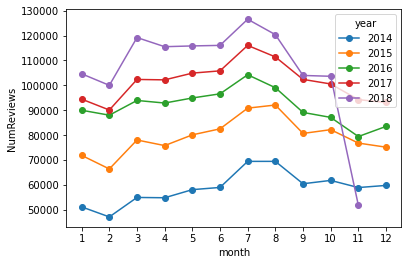

In [114]:
num_reviews_each_month_df.plot.line(marker='o')
plt.ylabel('NumReviews');
plt.xticks(range(1,13));

Rõ ràng là việc ăn (và review) ở ngoài của người Mỹ là khác biệt theo từng tháng và đi theo một pattern nhất định từng năm: ít nhất vào giai đoạn cuối năm trước đến đầu năm sau (thường chạm đáy vào tháng 2 hay tháng 11) và tăng lên nhiều nhất vào các tháng mùa hè (đặc biệt là tháng 7).

**Giả thuyết:**

Theo suy đoán cá nhân và một [bài báo](https://bizfluent.com/info-8388818-busiest-periods-restaurant-business.html) kiếm được, nhìn chung các tháng hè thời tiết mát mẻ và cũng có một số ngày lễ lớn (Quốc Khánh Mỹ 4 tháng 7 chẳng hạn), người Mỹ thường thích đi ra ngoài ăn uống và các nhà hàng trong thời gian này cũng tăng cường khuyến mãi càng kích thích nhu cầu "đi ăn nhà hàng" của người Mỹ. 

Riêng những tháng cuối năm vào những ngày lễ như Tạ Ơn, Giáng Sinh thì người dân thường ở nhà đoàn tụ với gia đình hoặc dành tiền để mua sắm (Black Friday ngay sau đó) thay vì đi ăn ở ngoài. Điều thú vị là mặc dù tháng 1 năm sau có "nhích" lên nhưng tháng 2 lại "tụt" xuống, bài báo kia cũng không đề cập đến việc này, tháng này có Valentine em không biết có liên quan gì không...

### Top các nhà hàng đồ ăn Việt Nam phù hợp tiêu chí với tình hình hiện tại? Nhà hàng Việt Nam chất lượng nhất theo các bang?

Để trả lời câu hỏi này thì em sẽ thực hiện theo từng bước:

- Bước 1: Tạo dataframe mới `viet_res_df` gồm các nhà hàng có chứa keyword: Vietnamese trong **categories**
- Bước 2: Tách cột **attributes** của `viet_res_df` thành một dataframe mới chứa các cột là các *keys* có thể có của **attributes** với giá trị là *value* của nó (NaN nếu nhà hàng nào không có key này). Lưu ý là 2 dataframe mới tạo phải có cùng index
- Bước 3: Tạo dataframe `viet_res_df_sub` chứa các nhà hàng thỏa tiêu chí

Code bước 1:

In [147]:
viet_res_df = business_df[business_df.categories.str.contains('Vietnamese')].reset_index(drop=True)

Code bước 2:

In [124]:
viet_res_df['attributes'] = viet_res_df['attributes'].apply(lambda x: {} if x is None else x)  # attributes: NaN -> {} 

In [124]:
viet_res_att_df = pd.json_normalize(viet_res_df.attributes)

/home/huan/anaconda3/envs/py377/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
viet_res_att_df.head()

,BusinessParking,Ambience,BYOB,GoodForMeal,Corkage,BusinessAcceptsCreditCards,BikeParking,Alcohol,HasTV,OutdoorSeating,...,HappyHour,ByAppointmentOnly,BusinessAcceptsBitcoin,Music,Smoking,GoodForDancing,BestNights,CoatCheck,BYOBCorkage,DriveThru
0,None,"{'touristy': False, 'hipster': False, 'romanti...",False,"{'dessert': False, 'latenight': False, 'lunch'...",False,True,True,u'none',True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'garage': False, 'street': True, 'validated':...","{'romantic': False, 'intimate': False, 'classy...",NaN,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,u'beer_and_wine',True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'garage': False, 'street': True, 'validated':...","{'romantic': False, 'intimate': False, 'classy...",NaN,"{'dessert': False, 'latenight': True, 'lunch':...",NaN,NaN,True,u'beer_and_wine',True,False,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...",NaN,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,True,True,u'beer_and_wine',True,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'garage': False, 'street': True, 'validated':...",None,NaN,NaN,NaN,NaN,True,u'full_bar',True,True,...,True,NaN,NaN,"{'dj': False, 'background_music': True, 'jukeb...",u'no',True,"{'monday': False, 'tuesday': True, 'friday': F...",True,NaN,NaN


In [127]:
viet_res_att_df.columns

Index(['BusinessParking', 'Ambience', 'BYOB', 'GoodForMeal', 'Corkage',
       'BusinessAcceptsCreditCards', 'BikeParking', 'Alcohol', 'HasTV',
       'OutdoorSeating', 'WiFi', 'RestaurantsTableService',
       'WheelchairAccessible', 'RestaurantsTakeOut', 'Caters',
       'RestaurantsDelivery', 'GoodForKids', 'RestaurantsPriceRange2',
       'RestaurantsAttire', 'RestaurantsGoodForGroups',
       'RestaurantsReservations', 'NoiseLevel', 'DogsAllowed', 'HappyHour',
       'ByAppointmentOnly', 'BusinessAcceptsBitcoin', 'Music', 'Smoking',
       'GoodForDancing', 'BestNights', 'CoatCheck', 'BYOBCorkage',
       'DriveThru'],
      dtype='object')

Code bước 3:

In [169]:
crit = (viet_res_df['stars'] > 3.5) & (viet_res_df['review_count'] > 100) & (viet_res_att_df.RestaurantsTakeOut == 'True') & ((viet_res_att_df.RestaurantsPriceRange2 == '2')| (viet_res_att_df.RestaurantsPriceRange2 == '1'))
viet_res_df_sub = viet_res_df.loc[crit]
viet_res_df_sub

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,116,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'b...","Vietnamese, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,q3YnYPjLuBGRDi_59yTC5g,Sidestreet Pho and Grill,"8560 W Desert Inn Rd, Ste D1",Las Vegas,NV,89117,36.130041,-115.277785,4.0,707,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Vietnamese, Restaurants, American (Traditional)","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
6,iYT30UPGmLdmTRaAKz0Vvw,Be's Noodles & Banh Mi,11318 N Community House Rd,Charlotte,NC,28277,35.056411,-80.835407,4.5,254,1,"{'Caters': 'True', 'RestaurantsAttire': ''casu...","Vietnamese, Sandwiches, Noodles, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
11,uoZwJJaplLsktVrRw0JiQw,Pho Number One,"1955 W Baseline Rd, Ste 114",Mesa,AZ,85202,33.377582,-111.877018,4.0,201,1,"{'WiFi': 'u'no'', 'BusinessParking': '{'garage...","Thai, Vietnamese, Restaurants","{'Monday': '10:0-21:0', 'Wednesday': '10:0-21:..."
13,-8F04F54iDT6VgWPCgybug,Ineffable Ca Phe,3920 Penn Ave,Pittsburgh,PA,15224,40.464681,-79.959312,4.5,131,1,"{'RestaurantsTableService': 'False', 'BikePark...","Coffee & Tea, Restaurants, Food, Vietnamese, B...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,-Tpo5r3kF_z4iilx8JXhvA,Basil Box,351 Yonge Street,Toronto,ON,M5B 1S1,43.657899,-79.381268,4.0,174,1,"{'RestaurantsTakeOut': 'True', 'Caters': 'True...","Thai, Vietnamese, Restaurants, Gluten-Free","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
946,J3_FTjy9LAtTtoW_cLwPxg,CO,4201-D Park Rd,Charlotte,NC,28209,35.174959,-80.848742,4.0,439,1,"{'GoodForKids': 'True', 'RestaurantsAttire': '...","Korean, Vietnamese, Asian Fusion, Sushi Bars, ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
948,puAbLedY3pNlPA_TS5OjYg,Lobster & Pho,6901 Rockside Rd,Independence,OH,44131,41.395337,-81.641761,4.0,118,1,"{'NoiseLevel': ''average'', 'HasTV': 'True', '...","Vietnamese, Seafood, Cajun/Creole, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '15:0-21:0', ..."
952,4mYS-4UOjTKgsf0tX1_IkQ,Banh Mi & Ti,4502 Butler St,Pittsburgh,PA,15201,40.472145,-79.958936,4.5,252,1,"{'HasTV': 'False', 'RestaurantsReservations': ...","Restaurants, Vietnamese, Cafes, Bubble Tea, Food","{'Monday': '0:0-0:0', 'Tuesday': '11:0-18:0', ..."


In [170]:
viet_res_df[viet_res_df.name == 'Banh Mi Boys']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
283,ttuEwktrkmh3TUlSFPZqAA,Banh Mi Boys,399 Yonge Street,Toronto,ON,M5B,43.659097,-79.382078,4.0,483,1,"{'RestaurantsPriceRange2': '1', 'Alcohol': 'u'...","Vietnamese, Asian Fusion, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
360,ZhACHVw9k438Z3i-Gw9BHA,Banh Mi Boys,2365 Yonge Street,Toronto,ON,M4P 3J6,43.709246,-79.398444,4.0,108,1,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Vietnamese, Asian Fusion, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
788,N93EYZy9R0sdlEvubu94ig,Banh Mi Boys,392 Queen Street W,Toronto,ON,M5V 2A9,43.648827,-79.396970,4.5,1097,1,"{'Alcohol': 'u'none'', 'BikeParking': 'True', ...","Sandwiches, Restaurants, Food, Vietnamese, Asi...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [168]:
viet_res_att_df.iloc[283]

BusinessParking               {'garage': False, 'street': False, 'validated'...
Ambience                      {'romantic': False, 'intimate': False, 'classy...
BYOB                                                                        NaN
GoodForMeal                   {'dessert': False, 'latenight': False, 'lunch'...
Corkage                                                                     NaN
BusinessAcceptsCreditCards                                                  NaN
BikeParking                                                                True
Alcohol                                                                 u'none'
HasTV                                                                      True
OutdoorSeating                                                            False
WiFi                                                                      u'no'
RestaurantsTableService                                                   False
WheelchairAccessible                    

In [182]:
vet_res_best_each_state_df = viet_res_df.loc[viet_res_df.groupby(['state'])['stars'].agg('idxmax')]
vet_res_best_each_state_df[['state','name', 'stars']]

,state,name,stars
88,AB,Pho Hoang Vietnamese Restaurant,5.0
260,AZ,Vietshack,5.0
464,IL,Taste Of Thai,4.5
218,NC,Pho Me Vietnamese Kitchen,5.0
230,NV,Tasty Broth Pho Grill,5.0
0,OH,Pho Lee's Vietnamese Restaurant,4.5
78,ON,Che Thuy Nga,5.0
13,PA,Ineffable Ca Phe,4.5
144,QC,Jardin des Délices,5.0
400,SC,Pho and sushi,4.0


Tới đây khi nhìn state em mới phát hiện ra data còn có ở Canada (Toronto - ON, Alberta - AB, Quebec - QC) nữa chứ không chỉ ở Mỹ. Không biết quán Chè Thúy Nga ở Toronto này có bật nhạc Paris by Night không 🤔?

### Nhà hàng Châu Á chiếm số tỷ lệ như thế nào trong thị trường nhà hàng ở Mỹ, Canada theo từng bang (cụ thể là thống kê của 5 bang có nhiều nhà hàng nhất)?

Để trả lời câu hỏi này thì em sẽ thực hiện theo từng bước:

- Bước 1: Tính sổ lượng nhà hàng của các bang Mỹ-Canada và lấy ra 5 bang nhiều nhà hàng nhất bỏ vào trong series `res_by_state_df`
- Bước 2: Lấy ra những cửa hàng thuộc loại châu Á (cụ thể: Vietnamese, Thai, Japanese, Korean, Chinese, Singaporean, Indian) và tính số lượng cửa hàng của từng loại theo bang 5 bang nhiều nhà hàng nhất (kết quả ở bước 1)
- Bước 3: Tính tỷ lệ của từng loại nhà hàng lên tổng số nhà hàng theo 5 bang
- Bước 4: Vẽ đồ thị stack bar chart để trực quan

Code bước 1:

In [226]:
res_by_state_df = business_df.groupby(['state'])['business_id'].agg('count').sort_values(ascending=False)[:5]
res_by_state_df

state
ON    11085
AZ     7871
NV     5309
QC     4678
OH     4349
Name: business_id, dtype: int64

Code bước 2:

In [203]:
df = business_df
df_explode = df.assign(categories = df.categories.str.split(', ')).explode('categories')
asian_res_df = df_explode[df_explode['categories'].str.contains('Vietnamese|Thai|Japanese|Korean|Chinese|Singaporean|Indian', case=True, na=False)]
asian_res_by_state_series = asian_res_df.groupby(['state','categories'])['business_id'].agg('count')

Restaurants               43965
Food                      11909
Fast Food                  7032
Nightlife                  6455
Bars                       6242
Sandwiches                 6094
Pizza                      5431
American (Traditional)     5407
Burgers                    4807
Breakfast & Brunch         4759
Name: categories, dtype: int64

Code bước 3:

In [231]:
asian_res_by_state_series = asian_res_by_state_series.loc[res_by_state_df.index]  # five most-restaurant states 
ratio_asian_res_by_state_series = asian_res_by_state_series / res_by_state_df

Code bước 4:

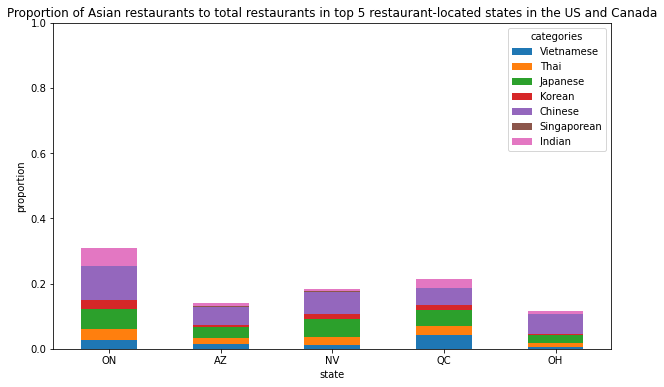

In [254]:
ax = ratio_asian_res_by_state_series.unstack().plot(kind='bar', figsize=(10, 6), y=["Vietnamese", "Thai", "Japanese", "Korean", "Chinese", "Singaporean", "Indian"], rot=0, stacked=True)
ax.set_ylabel('proportion')
ax.set_ylim((0,1))
ax.set_title('Proportion of Asian restaurants to total restaurants in top 5 restaurant-located states in the US and Canada');

Có vẻ như 2 bang ở Canada số lượng nhà hàng Châu Á chiếm khá đáng kể, nhà hàng món Việt cũng góp phần không nhỏ trong tỷ lệ này.

-------

## Nhìn lại quá trình làm đồ án

### Khó khăn, thuận lợi

Mặc dù đồ án này có thể còn nhiều thiếu sót, nhưng phải nói thật trong quá trình làm đồ án này em đã gặp khá nhiều khó khăn, xui xẻo, nhưng trong đó cũng "lòi" ra những may mắn, thuận lợi.

- Lựa chọn dataset theo chủ đề em cảm thấy có thể "enjoy": Khi chọn được chủ đề "ẩm thực, ăn uống, món ăn,.." thì trong đầu em không hề có gì ngoài dataset "playground": What's cooking? và một vài cái dataset vô vọng về ẩm thực trên Kaggle. Dataset "What's cooking?" thì không thể tận dụng được lợi thế của pandas, chỉ có 2 cột thông tin("cusine" và "ingredient") là quá ít cho một đồ án cuối kỳ, nếu dùng thì cũng chắc vẽ được một số network graph hay bart-chart ingredients thường dùng của món Tây, Ta,... Trong lúc vừa phân vân không biết nên theo hay bỏ qua chủ đề này, vừa mơ tưởng đến dataset của Foody thì sực nhớ ra có Yelp! Search Kaggle thấy Yelp dataset như vớ được vàng.

- Dataset "khủng long": 10GB, định dạng json, version cũ chứa các file csv thì "404 Not Found". Đọc data từ json thì mới được 1 file, file còn lại 6GB cứ mỗi lần đọc là crash đơ máy, reset by force. Giảm chunksize đủ kiểu nhưng vẫn vậy, tuyệt vọng định chấp nhận hy sinh file reviews thì may mắn trở lại với file reviews.csv được uploaded cách đây 1 năm trên Kaggle bởi một người hùng thầm lặng (😅 em cũng không chắc việc này có violate agreement của Yelp hay không), mặc dù mấy cột string hơi sai định dạng tý, coi như việc preprocessing thường làm. Vì file quá năng nên từ lúc bắt đầu làm đến giờ em chỉ dám re-load kernel đúng 2 lần! 

- Phần đặt câu hỏi thì chắc ai làm đồ án cũng gặp khó chỗ này, nên chắc em không than nữa. \*quit my bitching\*

### Những điều hữu ích học được

Qua đồ án này thì em cũng đã học được rất nhiều điều hữu ích:

- Vận dụng kiến thức đã học, theo sự hướng dẫn, sự tổ chức notebook, "code cũ", ý tưởng của thầy Kiên để từng bước làm theo, áp dụng lên dữ liệu, giải quyết bài toán từ dữ liệu.

- Cảm nhận rõ ràng với quy trình khoa học dữ liệu, tập làm quen với sự xuất hiện của những khó khăn không lường trước. 

(Và nhiều điều hữu ích khác mà em sợ nếu cứ tiếp tục kể em sẽ bịa ra lung tung)

### Nếu có thời gian thì sẽ làm thêm gì?

Nếu có thời gian thêm thì em sẽ tìm cách đọc được toàn bộ file reviews (cả những cột mà em bỏ để tránh "đơ máy" bao gồm cột **text** chứa nội dung reviews). Cột **text** chứa thông tin đánh giá rất quan trọng nếu muốn phân tích quan điểm, thích/ ghét, keywords, món nổi bật của quán,... Cho nên nếu đọc được **text** của toàn bộ 6 triệu review em nghĩ sẽ có thể làm được và biết thêm một vài điều thú vị.

---

## Tài liệu tham khảo

[1] File notebook về Pandas (Demo-11 đến Demo-14) của thầy Kiên.

[2] 3 file bài tập (BT01 đến BT03) của thầy Kiên huướng dẫn.

[3] Slide 15-TongKet_ĐACK

[4] https://towardsdatascience.com/converting-yelp-dataset-to-csv-using-pandas-2a4c8f03bd88

[5] https://towardsdatascience.com/discover-your-next-favorite-restaurant-exploration-and-visualization-on-yelps-dataset-157d9799123c

[6] https://bizfluent.com/info-8388818-busiest-periods-restaurant-business.html

[7] [pandas documentation](https://pandas.pydata.org/docs/)